In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

## NewCustomerList Analysis

In [12]:
df_NCL = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'NewCustomerList')

In [15]:
df_NCL.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.99,1.2375,1.546875,1.314844,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.80,0.8000,1.000000,0.850000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.46,0.4600,0.460000,0.460000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.40,0.5000,0.500000,0.500000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.69,0.6900,0.862500,0.862500,4,4,1.703125


In [18]:
df_NCL.shape

(1000, 23)

## NewCustomerList sheet has 1000 rows and 23 columns out of which 5 columns are unnamed and relevancy of the columns is not established. It is recommend to give column names. For the time being removing the columns. 

In [22]:
df_NCL.drop(df.columns[[16,17,18,19,20]], axis = 1, inplace = True)
df_NCL.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [24]:
df_NCL.shape

(1000, 18)

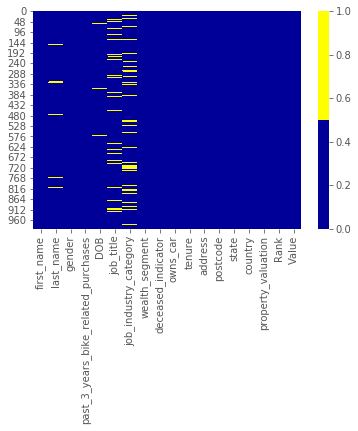

In [27]:
cols = df_NCL.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df_NCL[cols].isnull(), cmap=sns.color_palette(colours))

In [29]:
# % of missing.
for col in df_NCL.columns:
    pct_missing = np.mean(df_NCL[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

first_name - 0.0%
last_name - 3.0%
gender - 0.0%
past_3_years_bike_related_purchases - 0.0%
DOB - 2.0%
job_title - 11.0%
job_industry_category - 16.0%
wealth_segment - 0.0%
deceased_indicator - 0.0%
owns_car - 0.0%
tenure - 0.0%
address - 0.0%
postcode - 0.0%
state - 0.0%
country - 0.0%
property_valuation - 0.0%
Rank - 0.0%
Value - 0.0%


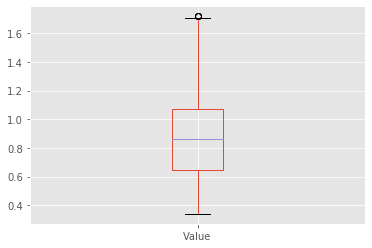

In [37]:
df_NCL.boxplot(column=['Value'])

In [38]:
df_NCL['DOB'].describe()

count                     983
unique                    958
top       1961-07-31 00:00:00
freq                        2
first     1938-06-08 00:00:00
last      2002-02-27 00:00:00
Name: DOB, dtype: object

In [39]:
num_rows = len(df_NCL.index)
low_information_cols = [] #

for col in df_NCL.columns:
    cnts = df_NCL[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

deceased_indicator: 100.00000%
N    1000
Name: deceased_indicator, dtype: int64

country: 100.00000%
Australia    1000
Name: country, dtype: int64



In [40]:
df_NCL.drop(df.columns[[8,14]], axis = 1, inplace = True)
df_NCL.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,9,4,1.703125


In [41]:
df_NCL.shape

(1000, 16)

In [42]:
df_NCL.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
property_valuation                              int64
Rank                                            int64
Value                                         float64
dtype: object

In [46]:
convert_dict = {'first_name': str, 
                'last_name': str,
                'gender':str,
                'job_title':str,
                'job_industry_category':str,
                'wealth_segment':str,
                'owns_car':str,
                'address':str,
                'state':str
               } 
  
df_NCL = df_NCL.astype(convert_dict) 

In [47]:
df_NCL.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
property_valuation                              int64
Rank                                            int64
Value                                         float64
dtype: object

In [48]:
df_NCL.to_excel(r'NewCustomerList.xlsx', index = False)

## CustomerDemographic Analysis

In [49]:
df_CD = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerDemographic')

In [50]:
df_CD.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [52]:
df_CD.shape

(4000, 13)

In [56]:
df_CD.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [60]:
df_CD['gender'] = df_CD['gender'].replace({'F': 'Female', 'Femal': 'Female', 'M': 'Male'}) 

In [62]:
df_CD.gender.unique()

array(['Female', 'Male', 'U'], dtype=object)

In [63]:
i = df_CD[((df_CD.DOB == '1843-12-21'))].index
i

Int64Index([33], dtype='int64')

In [64]:
df_CD.drop(i)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [66]:
df_CD.drop(df_CD.columns[[10]], axis = 1, inplace = True)
df_CD

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes
...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,No
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes


In [67]:
for col in df_CD.columns:
    pct_missing = np.mean(df_CD[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

customer_id - 0.0%
first_name - 0.0%
last_name - 3.0%
gender - 0.0%
past_3_years_bike_related_purchases - 0.0%
DOB - 2.0%
job_title - 13.0%
job_industry_category - 16.0%
wealth_segment - 0.0%
deceased_indicator - 0.0%
owns_car - 0.0%


In [68]:
num_rows = len(df_CD.index)
low_information_cols = [] #

for col in df_CD.columns:
    cnts = df_CD[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

deceased_indicator: 99.95000%
N    3998
Y       2
Name: deceased_indicator, dtype: int64



In [69]:
df_CD.drop(df_CD.columns[[9]], axis = 1, inplace = True)
df_CD

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,No
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,Yes
...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,No
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,Yes
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,No
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,Yes


In [70]:
df_CD.to_excel(r'CustomerDemographic.xlsx', index = False)

## CustomerAddress Analysis

In [71]:
df_CA = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'CustomerAddress')

In [72]:
df_CA.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [73]:
df_CA.shape

(3999, 6)

In [74]:
df_CA.state.unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [75]:
df_CA['state'] = df_CA['state'].replace({'New South Wales': 'NSW', 'Victoria': 'VIC'}) 

In [76]:
df_CA.state.unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

In [77]:
df_CA

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [78]:
df_CA.drop(df_CA.columns[[4]], axis = 1, inplace = True)
df_CA

,customer_id,address,postcode,state,property_valuation
0,1,060 Morning Avenue,2016,NSW,10
1,2,6 Meadow Vale Court,2153,NSW,10
2,4,0 Holy Cross Court,4211,QLD,9
3,5,17979 Del Mar Point,2448,NSW,4
4,6,9 Oakridge Court,3216,VIC,9
...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,3
3995,4000,57042 Village Green Point,4511,QLD,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,10
3997,4002,8194 Lien Street,4032,QLD,7


In [79]:
df_CA.to_excel(r'CustomerAddress.xlsx', index = False)